In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


from pylab import rcParams
rcParams['figure.figsize'] = 13, 8

### 1. Получите и загрузите данные.


In [122]:
raw_data = pd.read_csv('train.csv')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.


In [123]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [124]:
# Удаляем категориальные
raw_data.drop(columns=['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], inplace=True)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [125]:
# Удаляем нули
raw_data = raw_data.dropna()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Age       714 non-null    float64
 2   SibSp     714 non-null    int64  
 3   Parch     714 non-null    int64  
 4   Fare      714 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 33.5 KB


In [166]:
# Разделим данные на Х и у
X = raw_data[['Age', 'SibSp', 'Parch', 'Fare']]
y = raw_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [167]:
# Обучим модель
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [171]:
# В качестве метрики посчитали ROC AUC
predictions = model.predict_proba(X_test)
roc_auc_score(y_test, predictions[:, 1])

0.7286163522012579

### 3.Снова загрузите полные данные.


In [129]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.


In [130]:
'''
Id Нам не нужен, так как это просто порядковый номер в нашем датасете. Имя также никак не влияет на исход.
Номер билета и каюта не являются значимыми, в отличии скажем от класса каюты.
'''
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

### 5. Проверьте данные на наличие пропущенных значений.
a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [132]:
losted_data = data.dropna().shape[0]*data.dropna().shape[1]
total_data = data.shape[0]*data.shape[1]

In [133]:
percent = 100 - (losted_data / total_data * 100)
print(f'Потеря данных: {round(percent, 4)}%')

Потеря данных: 20.0898%


b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.


In [134]:
# Посчитаем метрики
print(data['Age'].mode()[0])
print(data['Age'].mean())
print(data['Age'].median())
print(np.std(data['Age'], ddof=1))
print(data['Age'].value_counts().head(5))

24.0
29.69911764705882
28.0
14.526497332334044
24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: Age, dtype: int64


In [135]:
# Заменим медианой и посчитаем метрики заново. Видими что перекос невысокий (Хотя мода сместилась на 4 пункта). Оставляем.

data['Age'] = data['Age'].fillna(data['Age'].median())

print(data['Age'].mode()[0])
print(data['Age'].mean())
print(data['Age'].median())
print(np.std(data['Age'], ddof=1))
print(data['Age'].value_counts().head(5))

28.0
29.36158249158249
28.0
13.019696550973194
28.0    202
24.0     30
22.0     27
18.0     26
19.0     25
Name: Age, dtype: int64


In [136]:
# По метрикам видим что мода (с подавляющим отрывом) в классе S. 
print(data['Embarked'].mode()[0])
print(data['Embarked'].value_counts().head(5))

S
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [137]:
# заменим наши 2 пропуска ей.
data['Embarked'] = data['Embarked'].fillna('S')

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### 6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.


In [139]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [140]:
# get dummies
data = pd.get_dummies(data, columns=['Pclass', 'Embarked'])

In [141]:
# Label encoder
le = LabelEncoder()
le.fit(data['Sex'])
le.classes_

data['Sex'] = pd.Series(data=le.transform(data['Sex']))

In [142]:
data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,1,35.0,0,0,8.0500,0,0,1,0,0,1


### 7. Проверьте данные на наличие выбросов.
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.


In [143]:
# Считаем межквартильный размах. Видим выбросы, НО, так как речь о возрасте, то все низкие значения говорят 
# о младенцах и детях. Значений выше 80 также не обнаружено. 80 лет одному человек, что вполне себе реально. 
# Вывод - оставляем, все как есть.
iqr1 = data['Age'].quantile(0.75) - data['Age'].quantile(0.25)
low1 = data['Age'].quantile(0.25) - (1.5 * iqr1)
upp1 = data['Age'].quantile(0.75) + (1.5 * iqr1)
rem_out1 = data[~data['Age'].between(low1, upp1, inclusive=True)]
print(len(rem_out1['Age']))
print(rem_out1['Age'].value_counts())
print(rem_out1['Age'].unique())

66
2.00     10
1.00      7
58.00     5
60.00     4
62.00     4
56.00     4
61.00     3
65.00     3
59.00     2
0.83      2
70.00     2
63.00     2
71.00     2
55.00     2
64.00     2
0.75      2
57.00     2
80.00     1
0.42      1
0.67      1
0.92      1
66.00     1
55.50     1
70.50     1
74.00     1
Name: Age, dtype: int64
[ 2.   58.   55.   66.   65.    0.83 59.   71.   70.5  55.5   1.   61.
 56.   62.   63.    0.92 60.   64.    0.75 57.   80.   70.    0.67  0.42
 74.  ]


C:\Users\voron\AppData\Local\Temp/ipykernel_16736/1937474737.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  rem_out1 = data[~data['Age'].between(low1, upp1, inclusive=True)]


In [144]:
# Считаем межквартильный размах. 
iqr2 = data['Fare'].quantile(0.75) - data['Fare'].quantile(0.25)
low2 = data['Fare'].quantile(0.25) - (1.5 * iqr2)
upp2 = data['Fare'].quantile(0.75) + (1.5 * iqr2)
rem_out2 = data[~data['Fare'].between(low2, upp2, inclusive=True)]
print(len(rem_out2['Fare']))
print(rem_out2['Fare'].value_counts())
print(rem_out2['Fare'].unique())

116
69.5500     7
73.5000     5
110.8833    4
151.5500    4
263.0000    4
120.0000    4
79.2000     4
227.5250    4
90.0000     4
211.3375    3
86.5000     3
77.9583     3
135.6333    3
153.4625    3
79.6500     3
512.3292    3
83.1583     3
113.2750    3
76.7292     3
164.8667    2
89.1042     2
78.2667     2
93.5000     2
133.6500    2
106.4250    2
71.0000     2
134.5000    2
69.3000     2
78.8500     2
262.3750    2
108.9000    2
91.0792     2
66.6000     2
247.5208    2
77.2875     2
83.4750     2
80.0000     2
82.1708     2
146.5208    2
75.2500     1
76.2917     1
211.5000    1
81.8583     1
221.7792    1
71.2833     1
Name: Fare, dtype: int64
[ 71.2833 263.     146.5208  82.1708  76.7292  80.      83.475   73.5
  77.2875 247.5208  79.2     66.6     69.55   113.275   76.2917  90.
  86.5    512.3292  79.65   153.4625 135.6333  77.9583  78.85    91.0792
 151.55   110.8833 108.9     83.1583 262.375  164.8667 134.5    133.65
  75.25    69.3    211.5    227.525  120.      81.8583  89

C:\Users\voron\AppData\Local\Temp/ipykernel_16736/3003471449.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  rem_out2 = data[~data['Fare'].between(low2, upp2, inclusive=True)]


In [145]:
# Делавю доп. сравнение метрик
print(data['Fare'].mode()[0], '---', rem_out2['Fare'].mode()[0])
print(data['Fare'].mean(), '---', rem_out2['Fare'].mean())
print(data['Fare'].median(), '---', rem_out2['Fare'].median())
print(np.std(data['Fare'], ddof=1), '---', np.std(rem_out2['Fare'], ddof=1))
print(data['Fare'].value_counts().head(5), rem_out2['Fare'].value_counts().head(5))

8.05 --- 69.55
32.2042079685746 --- 128.29162931034472
14.4542 --- 90.0
49.693428597180905 --- 84.63690766263493
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
Name: Fare, dtype: int64 69.5500     7
73.5000     5
110.8833    4
151.5500    4
263.0000    4
Name: Fare, dtype: int64


In [146]:
# Так как у нас есть много выбросов и все значения выше, примерно 70-80, считаются выбросами. Скорее всего, 
# это связано с тем что в последние дни продаж, билеты стали дорожать, особенно в дорогом классе.
# Общее кол-во выбросов 116, а мы видим, что в каждом классе, минимум в полтора раза больше билетов.
# Это моя субъективная логика. Думаю надо посмотреть несколько очень дорогих билетов и исключить их.
print(data['Pclass_3'][data['Pclass_3'] == 1].count(),
     data['Pclass_2'][data['Pclass_2'] == 1].count(),
     data['Pclass_1'][data['Pclass_1'] == 1].count())

491 184 216


In [147]:
print(data['Fare'][data['Fare'] > 500].count())
print(data['Fare'][data['Fare'] > 450].count())
print(data['Fare'][data['Fare'] > 400].count())
print(data['Fare'][data['Fare'] > 350].count())
print(data['Fare'][data['Fare'] > 300].count())
print(data['Fare'][data['Fare'] > 250].count()) # Думаю можно остановится на этом пороге
print(data['Fare'][data['Fare'] > 200].count())

3
3
3
3
3
9
20


In [148]:
data = data[data['Fare'] < 250]

### 8. *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)


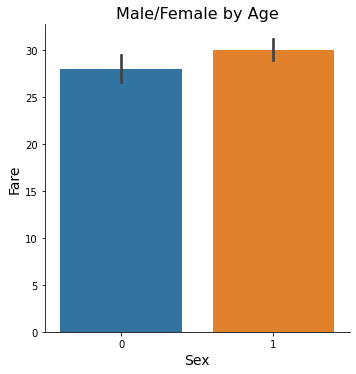

In [231]:
sns.catplot(data = data, kind="bar", x='Sex', y='Age')
plt.title('Male/Female by Age', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Age', fontsize=14)

plt.show()

### 9. *Попробуйте математически преобразовать признак Age.


In [184]:
# Не совем понял о чем речь.

### 10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.


In [169]:
X1 = data[data.columns[1:]]
y1 = data['Survived']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 21)

model2 = LogisticRegression()
model2.fit(X1_train, y1_train)

predictions2 = model2.predict_proba(X1_test)
roc_auc_score(y1_test, predictions2[:, 1])

D:\DataSci\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9199946033459255

### 11. Сформулируйте выводы по проделанной работе.
a) Кратко опишите какие преобразования были сделаны и почему.


1. Для начала мы убрали все ненужные данные / шумы, из нашего датасета, которые не несли веса для наших данных (Имена, номера билетов и кабин и т.д.)
2. Далее мы нашли и заменили пропуски в данных на подходящие рассчитанные метрики.
3. Преобразовали ктегории использую LabelEncoder и get_dummies.
4. Изучили типы данных (все ли данные заполнены и имеют корректный формат) и на этом предобработка закончилась.
5. далее задавали признаки, разбивали выборку, обучали ее и смотрели на метрику качества.

b) Сравните метрики моделей из п. 2 и п. 10.


In [183]:
print(f'Модель на "гряных" данных имеет точность ROC_AUC: {roc_auc_score(y_test, predictions[:, 1]):.5f}\n\
Модель предобработнная имеет точность ROC_AUC: {roc_auc_score(y1_test, predictions2[:, 1]):.5f}', )

Модель на "гряных" данных имеет точность ROC_AUC: 0.72862
Модель предобработнная имеет точность ROC_AUC: 0.91999


c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

#### Предобработка дала нам выигрыш почти на 20 пунктов из 100 возможных, что на порядок улучшает точность наших предсказаний. На больших данных также необходим анализ, очитска и заполнение пропусков в данных.
